In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import interp
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_curve, auc, roc_auc_score, make_scorer, plot_precision_recall_curve

%matplotlib inline

%run utils.py
%run plots.py

/Users/taahase8/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
X, y = load_fraud_data()

## Fitting a model

In [3]:
random_forest = RandomForestClassifier()

parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'criterion': ('gini', 'entropy')
}
clf = GridSearchCV(random_forest,
                   param_grid=parameters,
                   cv=StratifiedKFold(n_splits=5),
                   scoring=make_scorer(score_evaluation))

model = clf.fit(X, y)

print('best params', model.best_params_)
print('score', model.score(X, y))

best params {'criterion': 'gini', 'n_estimators': 150}
score 520


In [4]:
clf = RandomForestClassifier(n_estimators=200, criterion='gini')

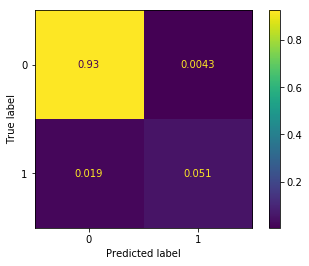

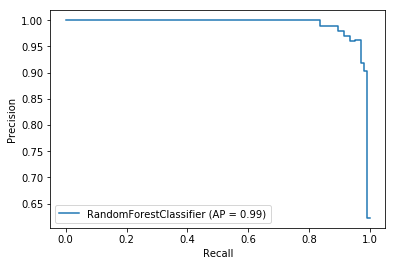

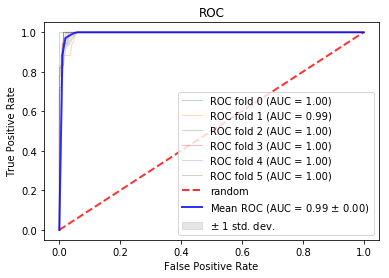

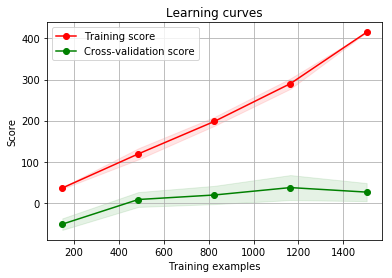

In [5]:
plot_classifier(clf, X, y)

max score: 132.07070707070707
threshold: 0.56


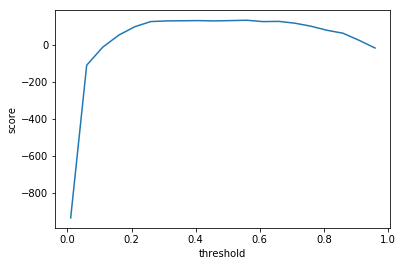

In [6]:
def predictor(X_test):
    return model.predict_proba(X_test)[:,1]

max_score, best_threshold = find_best_thresh(predictor, X, y)

## Final score

In [7]:
get_test_score(predictor, best_threshold)

10455